# Assignment 3 - Supervised Learning

## *YOUR FULL NAME HERE*
Netid:  *Your netid here*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

**(a)** What is the likelihood function of the data that we will wish to maximize?

$l(\mathbf{w,x})=\prod\limits_{i=1}^{N}\sigma(\mathbf{w^Tx})^{y_i}(1-\sigma(\mathbf{w^Tx}))^{1-"y_i}$, where $\sigma(\mathbf{w^Tx})=\frac{e^x}{1+e^x}=\frac{e^{w_0+w_1x_1+w_2x_2}}{1+e^{w_0+w_1x_1+w_2x_2}}$.

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

$C(\mathbf{w})=-\ln(l(\mathbf{w,x}))=-\sum_{i=1}^N\ln[\sigma(\mathbf{w^Tx})^{y_i}(1-\sigma(\mathbf{w^Tx})^{1-y_i})]=-\sum_{i=1}^N[y_i\ln\sigma(\mathbf{w^Tx})+(1-y_i)\ln(1-\sigma(\mathbf{w^Tx}))]=-\sum_{i=1}^N[y_i\mathbf{w^Tx-\ln(1+e^{\mathbf{w^Tx}})}]$.

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

$\frac{\partial C}{\partial w_0}=-\sum_{i=1}^N[y_i-\frac{e^{\mathbf{w^Tx}}}{1+e^{\mathbf{w^Tx}}}]x_0=-\sum_{i=1}^N[y_i-\sigma(\mathbf{w^Tx})]x_0$  
$\frac{\partial C}{\partial w_1}=-\sum_{i=1}^N[y_i-\frac{e^{\mathbf{w^Tx}}}{1+e^{\mathbf{w^Tx}}}]x_1=-\sum_{i=1}^N[y_i-\sigma(\mathbf{w^Tx})]x_1$  
$\frac{\partial C}{\partial w_2}=-\sum_{i=1}^N[y_i-\frac{e^{\mathbf{w^Tx}}}{1+e^{\mathbf{w^Tx}}}]x_2=-\sum_{i=1}^N[y_i-\sigma(\mathbf{w^Tx})]x_2$

$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}\: \frac{\partial C}{\partial w_1}\: \frac{\partial C}{\partial w_2}\right]=\left[ -\sum_{i=1}^N[y_i-\sigma(\mathbf{w^Tx})]x_0 \:\: -\sum_{i=1}^N[y_i-\sigma(\mathbf{w^Tx})]x_1 \:\: -\sum_{i=1}^N[y_i-\sigma(\mathbf{w^Tx})]x_2\right]$

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

${w}^{k+1}={w}^{k}-\eta\nabla_{\mathbf{w}}C(\mathbf{w})$, where $k$ is the step number

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

In [1]:
# import libraries
%config InlineBackend.figure_format = 'retina'
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

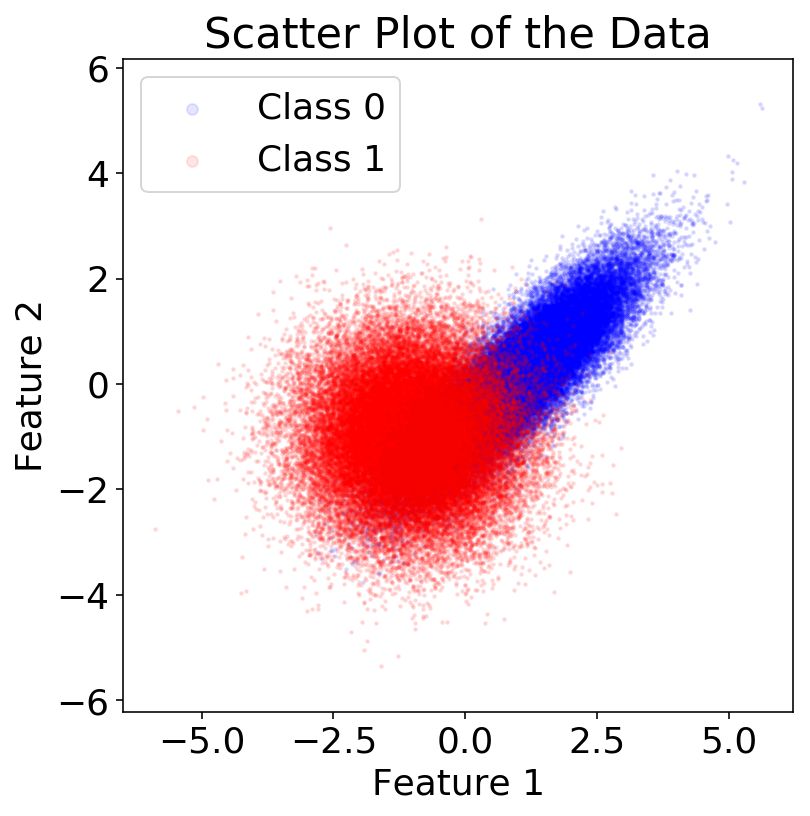

In [4]:
df = pd.read_csv('./data/A3_Q1_data.csv')                # read data
X = df.values[:, :2]
y = df.values[:, -1]
H0 = X[np.where(y == 0)[0], :]                           # seperate two classes
H1 = X[np.where(y == 1)[0], :]

# scatter plot the data
plt.figure(figsize=(6, 6))
plt.scatter(H0[:, 0],H0[:, 1], color='b', alpha=0.1, s=2, label='Class 0')
plt.scatter(H1[:, 0],H1[:, 1], color='r', alpha=0.1, s=2, label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of the Data")
lgnd = plt.legend()

# change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.axis('equal')                                       # this will be useful for next question
plt.show()

*Figure 1: Scatter plot of the two classes of synthetic data*

The data do not appear to be separable since almost half of the class 0 values overlap with class 1. However, it does appear that the optimal boundary may be quadratic, but close to linear. Logistic regression may be a good first algorithm to apply to the data, but likely not the optimal model. The data are not seperable, so the $\beta$ parameters will not goes to infinite and thus fail to converge.

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

There is no missing values in the data. The feature 1 and feature 2 are in the same scale. Therefore the data does not require any preprocessing.

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. 

In [9]:
# Logistic regression class
class Logistic_regression(object):
    # Class constructor
    def __init__(self, lr):
        self.learningrate = learningrate   # learning rate
        self.w = None                    # logistic regression weights
    
    # Method for calculating the sigmoid function
    def sigmoid(self, X):
        sigma = np.exp(X @ self.w)
        return sigma/(1 + sigma)
    
    # Cost function - calculates the cost/loss/error 
    def cost(self, X, y):
        pred = self.sigmoid(X)
        return -(y.T @ np.log(pred) + (1-y).T @ np.log(1 - pred))/X.shape[0]
    
    # gradient descent
    def gradient_descent(self, X, y):
        delta = self.learningrate * np.sum(X.T @ (self.sigmoid(X) - y))
        self.w -= delta
        return np.linalg.norm(delta)
    
    # Fit the logistic regression model to the data through stochastic gradient descent
    def fit(self, X, y, X_test, y_test, w, thresh, n_iter=500):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
        self.w = w
        self.loss = [self.cost(X, y)]
        self.loss_test = [self.cost(X_test, y_test)]
        for i in range(n_iter):
            delta = self.gradient_descent(X, y)
            self.loss.append(self.cost(X, y))
            self.loss_test.append(self.cost(X_test, y_test))
            if delta <= thresh:
                break
    
    # Use the trained model to make predictions
    def pred(self, X):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        return self.sigmoid(X)
    
    # Compute the linear decision boundary in the two dimensional case
    def decision_boundary(self, X):
        return -(self.w[0] + self.w[1] * X)/self.w[2]

Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

Answer included following item (k)

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

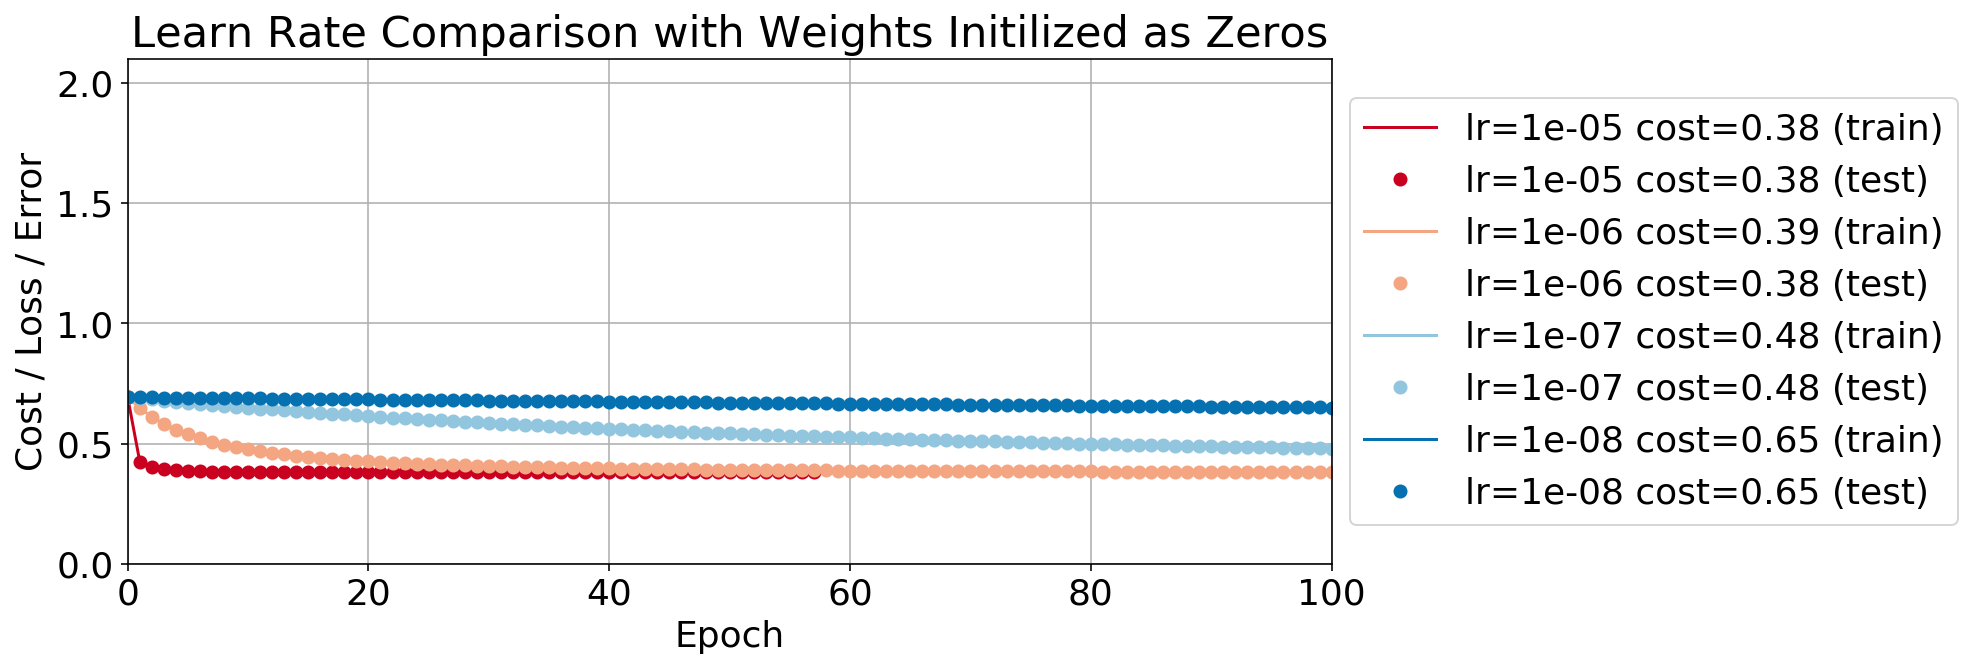

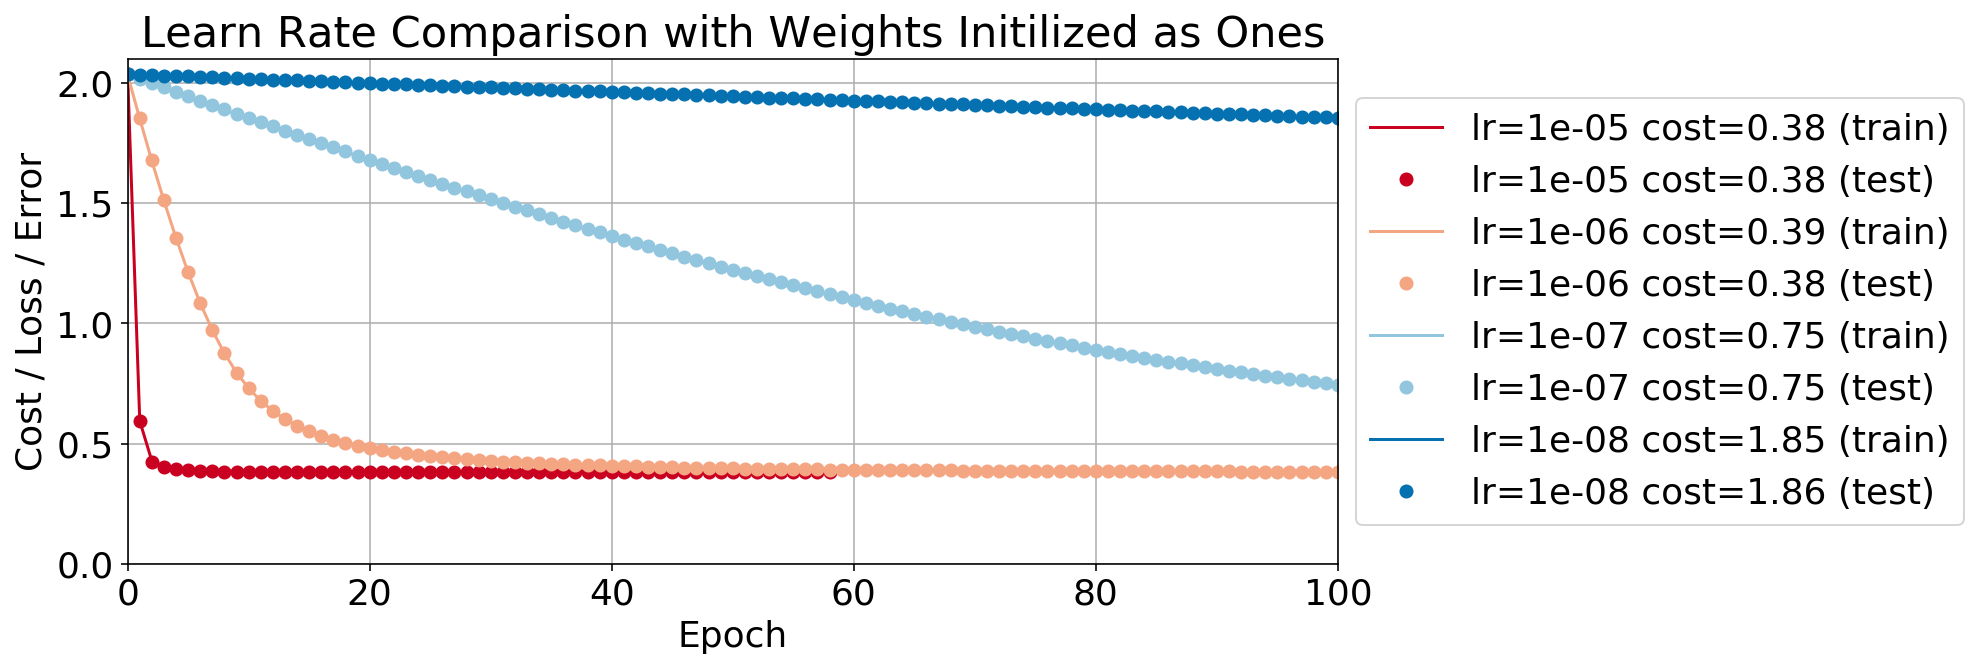

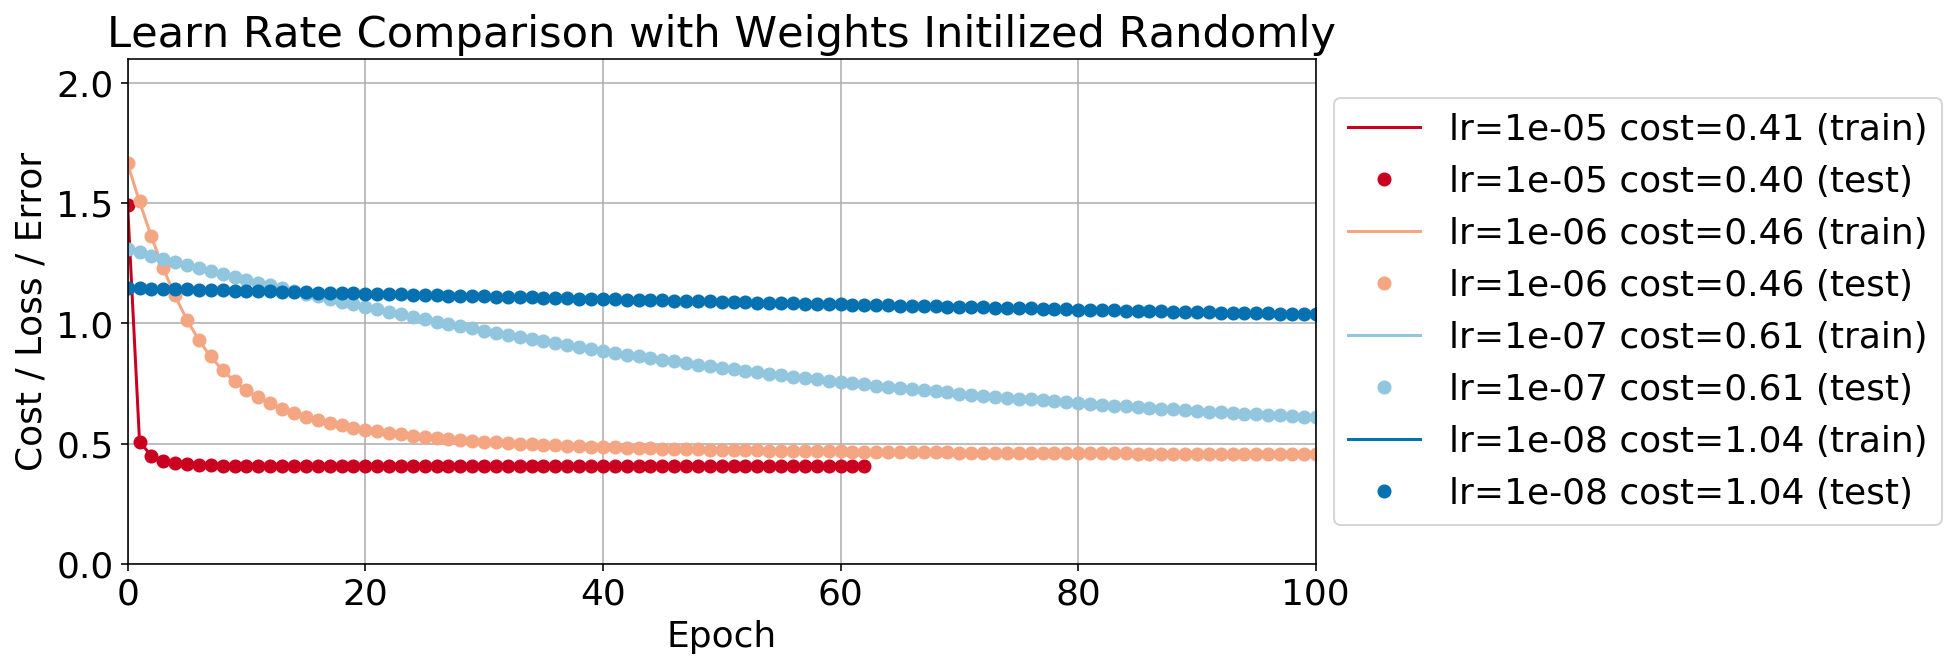

In [12]:
# divide the data into training and test datasets
n_sample = X.shape[0]
n_train = int(n_sample * 0.7)
X_train = X[:n_train, :]
y_train = y[:n_train]
X_test = X[n_train:, :]
y_test = y[n_train:]

# train the logistic regression classifier with different weight initializations
initialize_w = [np.zeros, np.ones, np.random.rand]
title_appendix = ['as Zeros', 'as Ones', 'Randomly']

# Compare the model cost/loss/error for different weight initializations and learning rates
color = ['#ca0020','#f4a582','#92c5de','#0571b0']
for j in range(3):
    plt.figure(figsize=(10, 5))
    for (index,i) in enumerate(range(5, 9)):
        learningrate = 1/np.power(10, i)
        w = initialize_w[j](X.shape[1]+1)
        clf = Logistic_regression(learningrate)
        clf.fit(X_train, y_train, X_test, y_test, w, 1e-5, n_iter=100)
        plt.plot(clf.loss, '-', 
                 label='LR={} Cost={:.2f} (train)'.format(learningrate, clf.loss[-1]),
                 color=color[index])
        plt.plot(clf.loss_test, 'o', 
                 label='LR={} Cost={:.2f} (test)'.format(learningrate, clf.loss_test[-1]),
                 color=color[index])
    plt.xlabel('Epoch')
    plt.ylabel('Cost / Loss / Error')
    plt.title('Learn Rate Comparison with Weights Initilized {}'.format(title_appendix[j]))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis([0,100,0,2.1])
    plt.grid('on')
    plt.tight_layout()
plt.show()

*Figure 2: Comparison of the stochastic gradient descent model fitting process using different weight initialization methods and varying the learning rate. The legend includes the learning rate that resulted in that particular curve and the lowest cost achieved by the algorithm.*

As shown in Figure 2, the algorithm was tested using three different methods of initializing $\mathbf{w}$: (1) initilize $\mathbf{w}$ as all zeros; (2) initialize $\mathbf{w}$ as all ones and (3) randomly initialize $\mathbf{w}$ and plotted the results comparison in three plots. In each plot, 4 different learning rates were tested, ranging from $10^{-5}$ to $10^{-8}$. The training cost curves are plotted in solid lines and test cost curves are plotted in dashed lines. The stopping criteria was chosen so that the fitting process (SGD) either reaches the maximum number of epochs (which was set to 100 by default) or converges such that the norm of weights is smaller than 1e-5. This stopping criteria is a common choice in many implementations of SGD in the literature. It is reasonable to stop the gradient descent process when there's only minor updates in $\mathbf{w}$ as it's unlikely to change significantly in the future. The final costs are also provided in legend of each plot.

**Weight initialization**: Different weight initializations dramatically impact the starting cost that's achieved by the algorithm. When initialized as all zeros, the algorithm start at the lowest cost compared with other two initialization approaches. When learning rate is large enough ($10^{-5}$ or $10^{-6}$), the algorithm cost can converge to nearly same value regardless of the initial points. However, when the learning rate is too small ($10^{-8}$, the algorithm does not reach that low of a cost.

**Learning rates**: The learning rates affect the convergence speed significantly. When $\eta=10^{-5}$, the algorithm converges less than 60 epochs and yields the lowest cost in both the training and testing data. This behavior remains consistent across three different initializations of $\mathbf{w}$.

*Note: This problem is actually a fairly simple dataset with a smooth cost function, and so all of the gradient descent techniques are heading towards the same minimum cost. However, in most problems this would not be the case, and in those situations the preferred method of these three would be randomization.*

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

In [14]:
# do 5 folds cross validation
pred_rf = []

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for cnt, (train_idx, test_idx) in enumerate(kf.split(X)):
    print('Training on fold {}'.format(cnt+1))
    X_train, X_test = X[train_idx, :], X[test_idx, :]
    y_train, y_test = y[train_idx], y[test_idx]
    clf = my_lr(1e-6)
    w = np.zeros(X.shape[1]+1)
    clf.fit(X_train, y_train, X_test, y_test, w, 1e-5, n_iter=100)
    pred_rf.append(clf.pred(X_test))
pred_rf = np.concatenate(pred_rf)

Training on fold 1
Training on fold 2
Training on fold 3
Training on fold 4
Training on fold 5


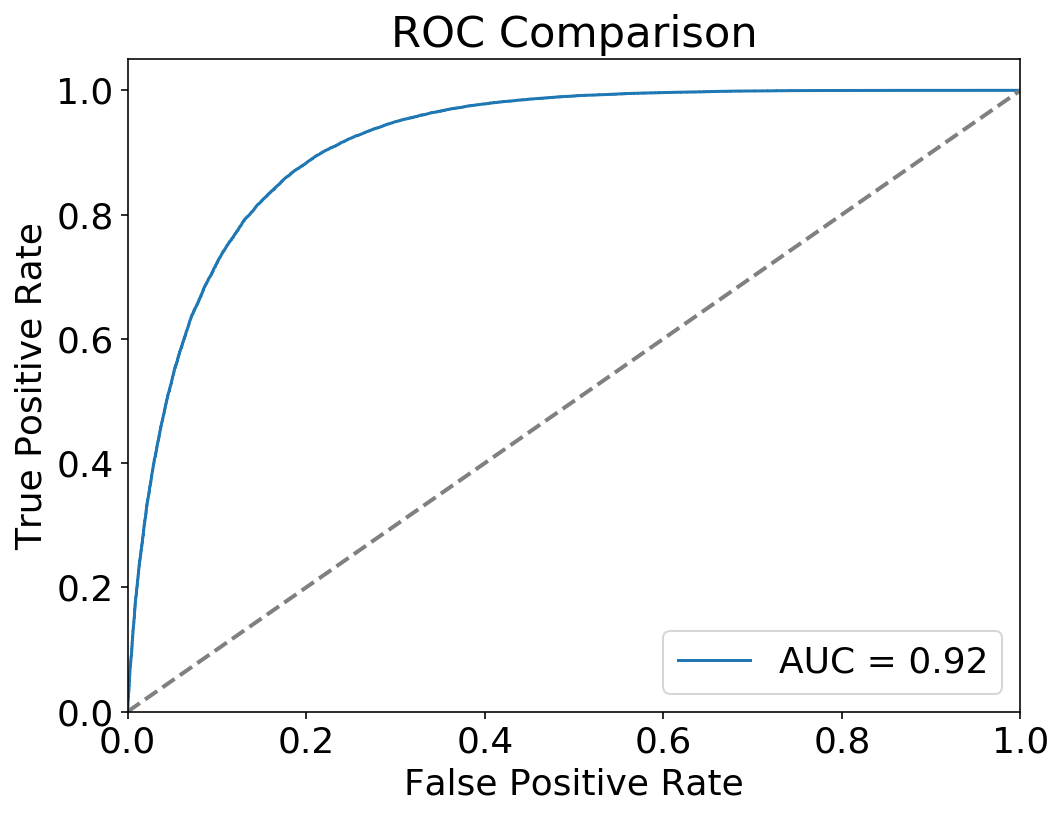

In [15]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y, pred_rf)
plt.plot(fpr_rf, tpr_rf, label='AUC = {:.2f}'.format(auc(fpr_rf, tpr_rf)))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend(loc="lower right")
plt.show()

*Figure 3: ROC curve demonstrating the logistic regression classifier performance*

The result has a high AUC of 0.92 and results in a smooth ROC curve since there are many normally-distributed points in the training sample.

**(m)** Why do we use cross validation?

Cross validation makes it possible to test the performance of the classifier on unseen data and this enables us to evaluate model generalization performance. Additionally, k-folds cross validation also makes an efficient use of data, which is extremely important when our dataset may be limited.

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

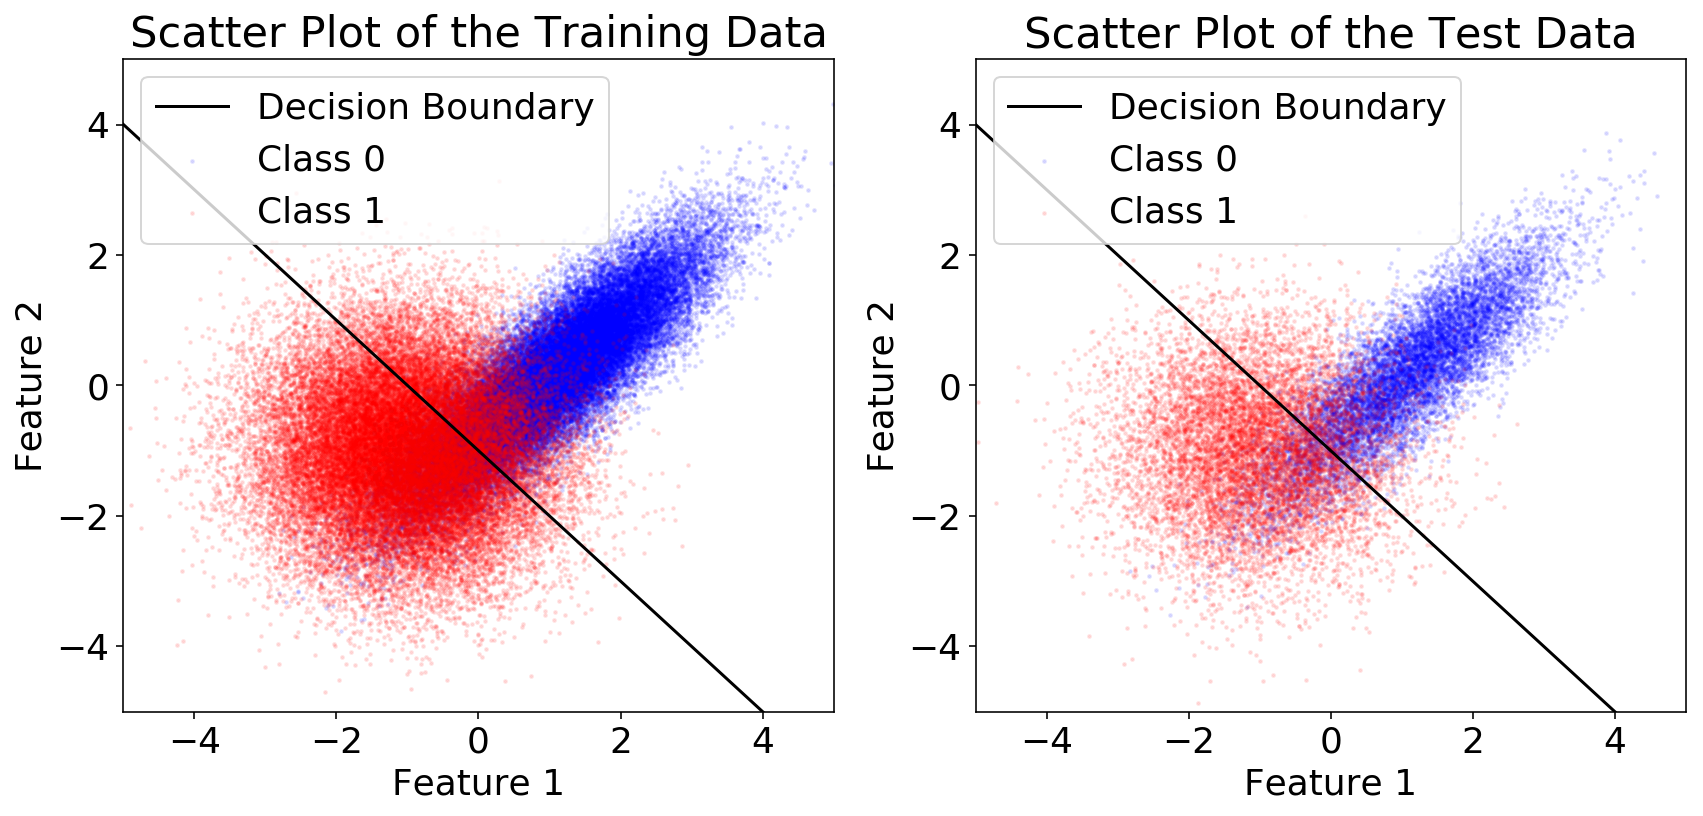

In [24]:
# Scatter plot the training data data
x_range = np.array([-6, 6])
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.scatter(X_train[np.where(y_train==0), 0], X_train[np.where(y_train==0), 1], 
            color='b', 
            alpha=0.1, 
            s=2, 
            label='Class 0')
plt.scatter(X_train[np.where(y_train==1), 0], X_train[np.where(y_train==1), 1], 
            color='r', 
            alpha=0.1, 
            s=2, 
            label='Class 1')
plt.plot(x_range, clf.decision_boundary(x_range),'k-',label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of the Training Data")
lgnd = plt.legend()

# Scatter plot the test data
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.subplot(122)
plt.scatter(X_test[np.where(y_test==0), 0], X_test[np.where(y_test==0), 1], 
            color='b', 
            alpha=0.1, 
            s=2, 
            label='Class 0')
plt.scatter(X_test[np.where(y_test==1), 0], X_test[np.where(y_test==1), 1], 
            color='r', 
            alpha=0.1, 
            s=2, 
            label='Class 1')
plt.plot(x_range, clf.decision_boundary(x_range),'k-',label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of the Test Data")
lgnd = plt.legend()
plt.axis([-5, 5, -5, 5])
plt.show()

*Figure 4: Scatter plots of the training and test datasets along with the logistic regression decision boundary*

The decision boundary is almost pependicular to the direction of greatest variance of class 0. Given the fact that the two classes in this dataset have a large overlapping region, the decision boundary is can be considered reasonable. To improve the the classifier, one simple way is to improve the flexibility of the model to enable the decision boundary to be quadratic or at least have a highly regularized non-linear decision boundary.

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Initialize variable for storing the predictions
pred_lr = []    # Logistic regression
pred_lin = []   # Linear regression
pred_rand = pred_rand = np.random.randint(2, size=n_sample)

# Compute 5 folds cross validated performance comparison for logistic regression, 
# linear regression, and random guessing

kf = KFold(n_splits=5)
for cnt, (train_idx, test_idx) in enumerate(kf.split(X)):
    print('Training on fold {}'.format(cnt+1))
    X_train, X_test = X[train_idx, :], X[test_idx, :]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Logistic regression (from the function we created)
    clf = Logistic_regression(1e-6)
    w = np.zeros(X.shape[1]+1)
    clf.fit(X_train, y_train, X_test, y_test, w, 1e-5, n_iter=100)
    pred_lr.append(clf.pred(X_test))
    
    # Linear regression with sklearn
    clf_lin = LinearRegression()
    clf_lin.fit(X_train, y_train)
    pred_lin.append(clf_lin.predict(X_test))
    
# Store the results    
pred_lr = np.concatenate(pred_lr)
pred_lin = np.concatenate(pred_lin)

Training on fold 1
Training on fold 2
Training on fold 3
Training on fold 4
Training on fold 5


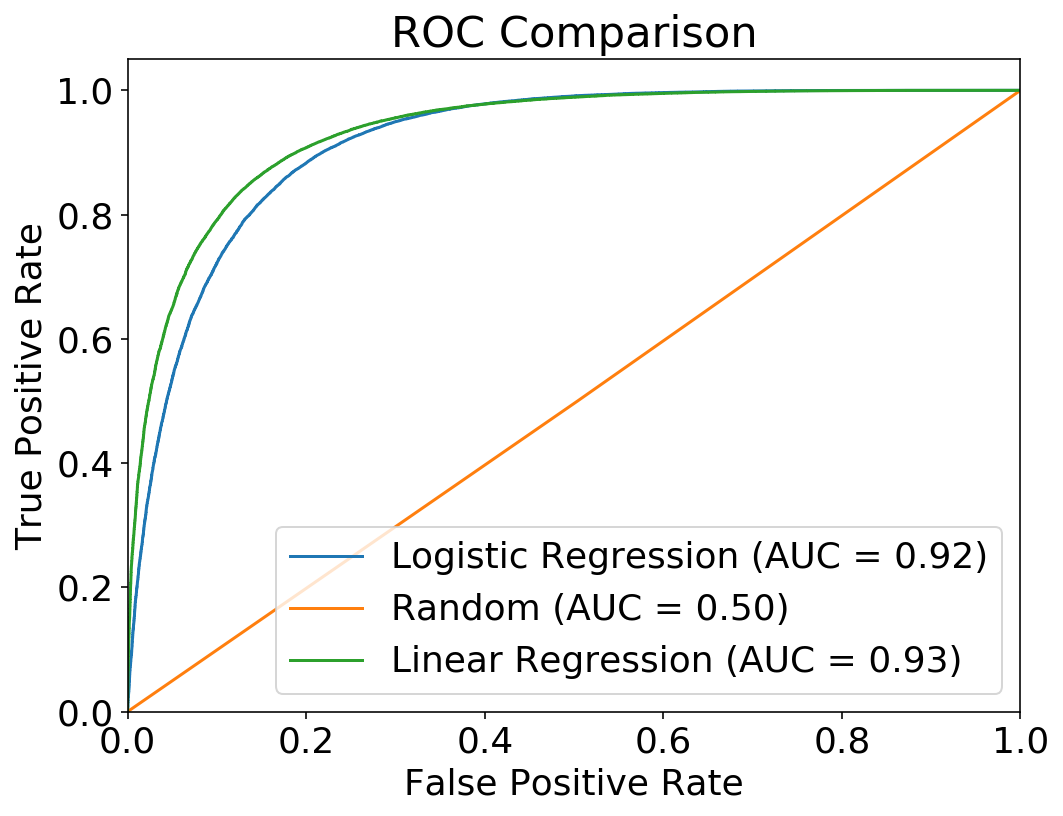

In [26]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))

# Compute the TPR and FPR for each set of predictions
fpr_lr, tpr_lr, _     = roc_curve(y, pred_lr)
fpr_rand, tpr_rand, _ = roc_curve(y, pred_rand)
fpr_lin, tpr_lin, _   = roc_curve(y, pred_lin)

# plot those rates in the form of the ROC curves
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_lr, tpr_lr)))
plt.plot(fpr_rand, tpr_rand, label='Random (AUC = {:.2f})'.format(auc(fpr_rand, tpr_rand)))
plt.plot(fpr_lin, tpr_lin, label='Linear Regression (AUC = {:.2f})'.format(auc(fpr_lin, tpr_lin)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend(loc="lower right")
plt.show()

*Figure 5: ROC curves for logistic regression, linear regression, and random guessing*

From the ROC curves, we can see that random guess has an AUC of 0.5. It is the worst case for a classifier, where you are just flipping a coin. Logistic Regression and Linear Regression has similar performance, but Linear Regression does slightly better for this particular case with normally distributed data.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

**ANSWER**

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

In [28]:
"""
Refer to https://gist.github.com/akesling/5358964 for a great example for reading MNIST data.

NOTE: You will need to have the MNIST data downloaded to: './data/MNIST/' 
in order for this section of code to work properly
"""

def read_ds(dataset = "training", path = "./data/MNIST/"):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = path + 'train-images.idx3-ubyte'
        fname_lbl = path + 'train-labels.idx1-ubyte'
    elif dataset is "testing":
        fname_img = path + 't10k-images.idx3-ubyte'
        fname_lbl = path + 't10k-labels.idx1-ubyte'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)
        
    # Binarize the label array
    lbl[np.where(lbl != 3)] = 0
    lbl = lbl/3
 
    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    return lbl, img

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

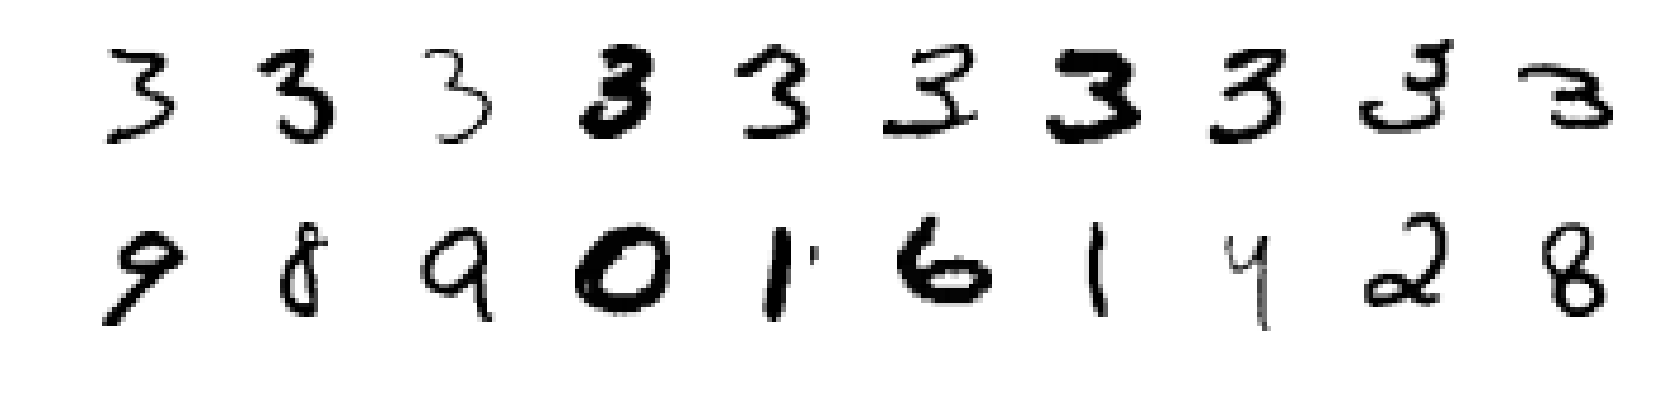

In [29]:
# load image and label data
lbl, img = read_ds('training')
h1_idx = np.where(lbl == 1)[0]
h0_idx = np.where(lbl == 0)[0]

# plot 10 samples
n_sample = 10
h1_idx_sample = np.random.choice(h1_idx, n_sample)
h0_idx_sample = np.random.choice(h0_idx, n_sample)
plt.figure(figsize=(14, 3))
for cnt, (h1, h0) in enumerate(zip(h1_idx_sample, h0_idx_sample)):
    plt.subplot(2, 10, 1+cnt)
    plt.imshow(img[h1, :, :],cmap='binary')
    plt.axis('off')
    plt.subplot(2, 10, 11+cnt)
    plt.imshow(img[h0, :, :],cmap='binary')
    plt.axis('off')
plt.show()

*Figure 6: Example digits. The first row represents samples from class 1 (threes) the second row contains examples of class 0 (other digits)*

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

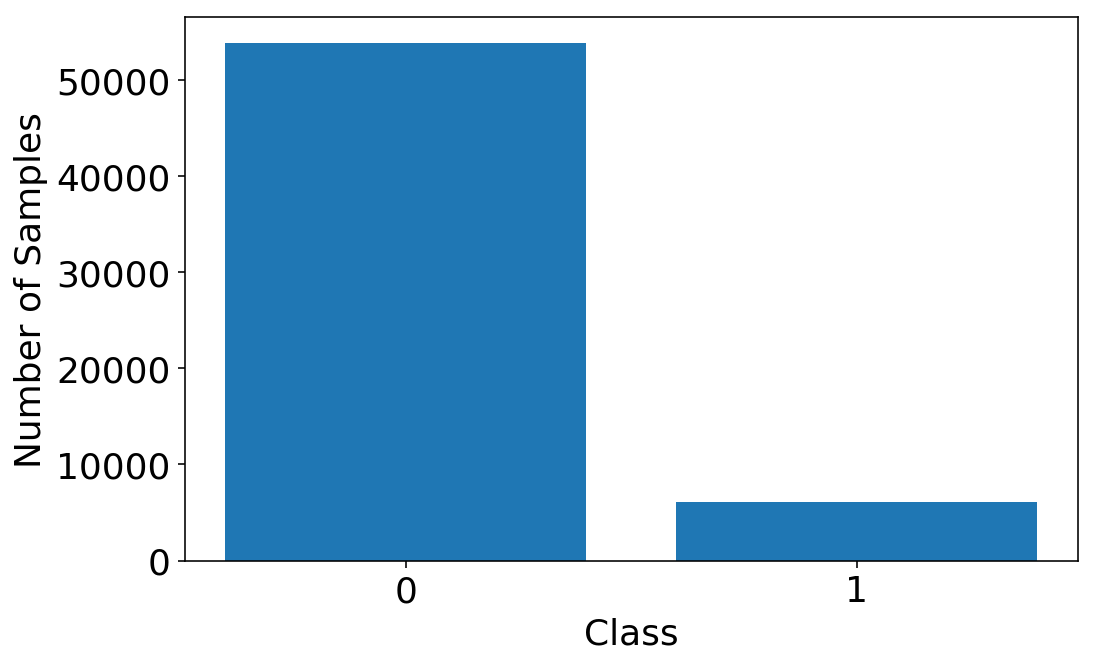

In [47]:
plt.figure(figsize=(8, 5))
#plt.hist(lbl, align='mid')
hist = np.histogram(lbl, bins=2)
plt.bar(np.array([0,1]),hist[0])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks([0,1])
plt.show()

*Figure 7: Histogram of the two classes demonstrating the imbalance between the classes*

In [43]:
print('{} examples in H1, {} examples in H0'.format(len(h1_idx), len(h0_idx)))

6131 examples in H1, 53869 examples in H0


There are 6131 examples in H1 and 53869 examples in H0 and so the classes are heavily imbalanced. This may cause the overall classification accuracy to be heavily dominated by the performance on one class. For example, a classifier that only predicts class 0 will be accurate 90 percent of the time. The classifier trained from imbalanced dataset will, therefore, tend to have higher missed detection rates for the under represented class.

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

# Here, we'll explore using a random forest classifier in conjunction with PCA
# NOTE: THIS CODE SEGMENT MAY TAKE SOME TIME TO COMPUTE
sample_num = img.shape[0]
pred_rf    = []

# Setup 5 folds cross validation
kf = KFold(n_splits=5)

# Prepare the image data for processing
img_flat = np.reshape(img, (img.shape[0], -1))

# (optional) Perform PCA to reduce the data to a lower dimensional space for improved performance
pca = PCA(n_components=3)
img_flat = pca.fit_transform(img_flat)
print('Reduced feature dimension to 3')

# Run the cross-validated performance assessment
for cnt, (train_idx, test_idx) in enumerate(kf.split(img_flat)):
    print('Training on fold {}'.format(cnt+1))
    X_train, X_test = img_flat[train_idx, :], img_flat[test_idx, :]
    y_train, y_test = lbl[train_idx], lbl[test_idx]
    clf             = RandomForestClassifier(n_estimators = 5000)
    clf.fit(X_train, y_train)
    pred_rf.append(clf.predict_proba(X_test))
pred_rf = np.concatenate(pred_rf)

Reduced feature dimension to 3
Training on fold 1
Training on fold 2
Training on fold 3
Training on fold 4
Training on fold 5


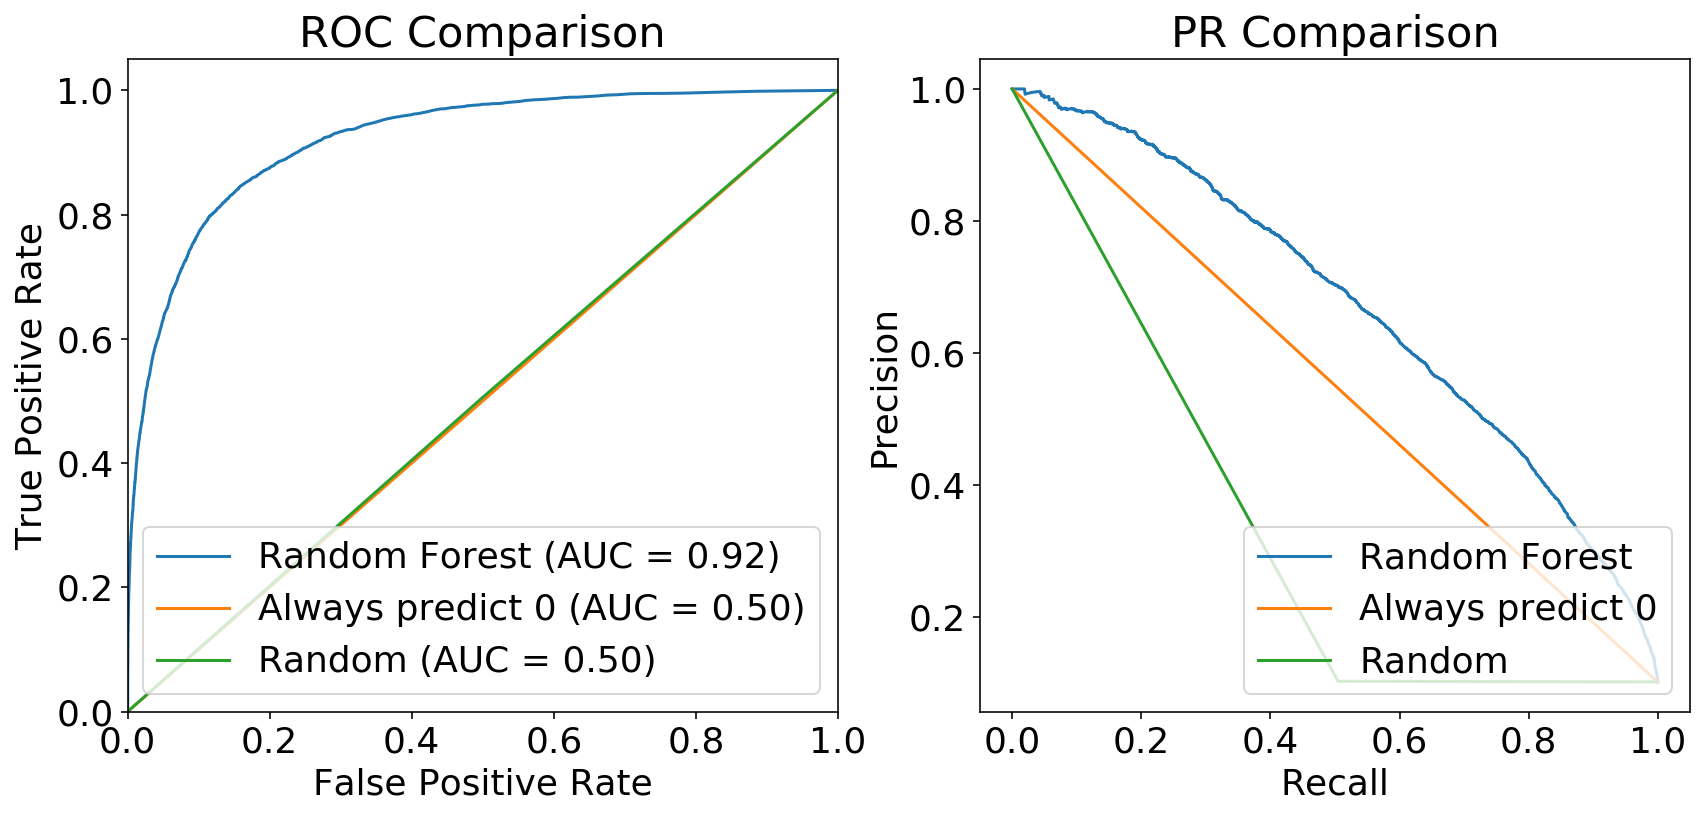

In [51]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

pred_rand = np.random.randint(2, size=sample_num) # Randomly guess a class
pred_h0   = np.zeros(sample_num)                  # Always predict zeros

# Compute the ROC curve data
fpr_rf, tpr_rf, _     = roc_curve(lbl, pred_rf[:, 1])
fpr_rand, tpr_rand, _ = roc_curve(lbl, pred_rand)
fpr_h0, tpr_h0, th    = roc_curve(lbl, pred_h0)

# Plot the ROC curves
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(fpr_rf, tpr_rf,     label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_h0, tpr_h0,     label='Always predict 0 (AUC = {:.2f})'.format(auc(fpr_h0, tpr_h0)))
plt.plot(fpr_rand, tpr_rand, label='Random (AUC = {:.2f})'.format(auc(fpr_rand, tpr_rand)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend(loc="lower right")

# Compute the precision Recall curve data
p_rf, r_rf, _     = precision_recall_curve(lbl, pred_rf[:, 1])
p_h0, r_h0, th    = precision_recall_curve(lbl, pred_h0)
p_rand, r_rand, _ = precision_recall_curve(lbl, pred_rand)

# Plot the PR curves
plt.subplot(122)
plt.plot(r_rf, p_rf,     label='Random Forest')
plt.plot(r_h0, p_h0,     label='Always predict 0')
plt.plot(r_rand, p_rand, label='Random')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Comparison')
plt.legend(loc="lower right")
plt.show()

*Figure 8: ROC and PR curves for the digits data comparing a random forest classifier to a classifier that always predicts class 0, and to random chance*

In the ROC plot shown above, Random Forest yields the best results overall, with an AUC of 0.92 while random guessing or the "always predict class 0" (which we'll refer to as the $H_0$ classifier since it always guesses the null hypothesis). Both random guessing and the $H_0$ classifier have AUCs around 0.5. For the PR curves, it is clear that Random Forest performs better than the $H_0$ classifier, which is always is better than random guessing. Random guessing is the worst case so it has worst performance in both metrics. For the $H_0$ classifier, due to the imbalance of the data, the Precision-Recall curve is better than random guessing because there are more examples of class zero than class one in the data.

**(f)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

In [52]:
from sklearn.linear_model import LogisticRegression

# Define a helper function for our logistic regression classifier with the $L_1$ penalty
def lr_clf(c, X_train, y_train, X_test, penalty='l1'):
    lr = LogisticRegression(penalty=penalty, C=c)
    lr.fit(X_train, y_train)
    return lr.predict_proba(X_test)[:, 1], lr.coef_ 

Due to computational constraints we will hold out 30% of data for testing in this problem.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, f1_score
from sklearn.metrics import roc_curve, auc

img_flat = np.reshape(img, (img.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(img_flat, lbl, test_size=0.3)
np.random.seed(1234)

non_zero = []
lr_cost  = []
f1       = []
AUC      = []
c_array = np.arange(0.1, 1, 0.1)
c_array = np.logspace(-4,0,10)

# Iterate over the regularization coefficient, C
for c in c_array:
    pred, params = lr_clf(c, X_train, y_train, X_test)
    
    # number of non-zero params
    non_zero.append(np.sum(params != 0))
    
    # logistic regression cost function
    lr_cost.append(log_loss(y_true=y_test, y_pred=pred))
    
    # f1 score
    f1.append(f1_score(y_true=y_test, y_pred=pred>0.5))
    
    # AUC
    fpr, tpr, _ = roc_curve(y_test, pred)
    AUC.append(auc(fpr, tpr))

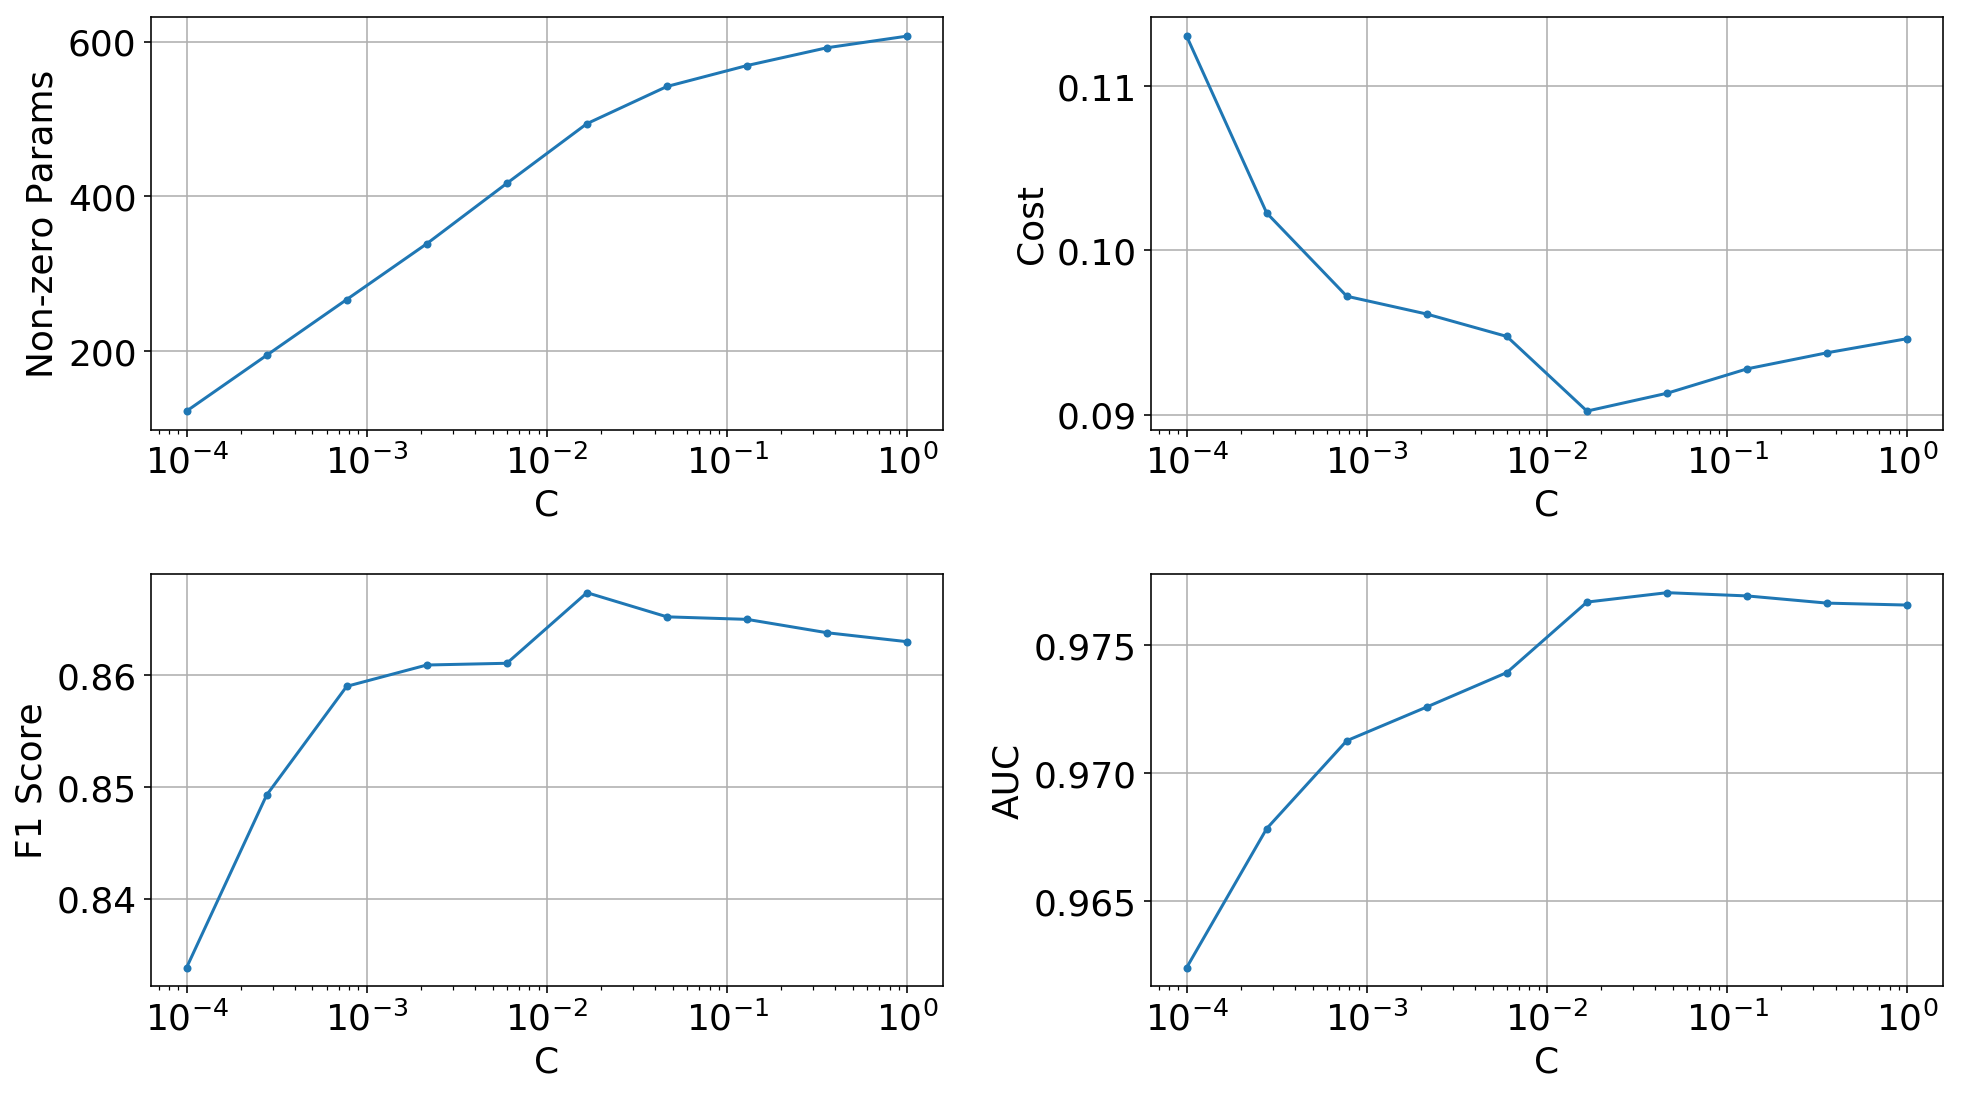

In [58]:
# Number of nonzero parameters
plt.figure(figsize=(14, 8))
plt.subplot(221)
plt.plot(c_array, non_zero, marker='.')
plt.grid('on')
plt.xticks(c_array, c_array)
plt.xlabel('C')
plt.ylabel('Non-zero Params')
plt.xscale('log')

# Logistic regression cost
plt.subplot(222)
plt.plot(c_array, lr_cost, marker='.')
plt.grid('on')
plt.xticks(c_array, c_array)
plt.xlabel('C')
plt.ylabel('Cost')
plt.xscale('log')

# F1 Score
plt.subplot(223)
plt.plot(c_array, f1, marker='.')
plt.grid('on')
plt.xticks(c_array, c_array)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.xscale('log')

# Area under the ROC curve (AUC)
plt.subplot(224)
plt.plot(c_array, AUC, marker='.')
plt.grid('on')
plt.xticks(c_array, c_array)
plt.xlabel('C')
plt.ylabel('AUC')
plt.tight_layout()
plt.xscale('log')
plt.show()

*Figure 9: A comparison of the number of nonzero parameters, cost (or loss), $F_1$ score, and ROC area under the curve (AUC) for the logistic regression classifier on the MNIST data as the inverse of the $L_1$ regularization parameter, $C$, varies.*

The parameter $C$ (which corresponds to increased model flexibility) is varied from a very small amount ($10^{-4}$) to 1. We see that the cost begins high when the system is overly regularized, but decreases to a minimum value around $C\simeq0.02$ after which the cost begings to rise again. We see similar optima for the $F_1$ score and the area under the ROC curve indicating that $C\simeq0.02$ corresponds to the best operating point for generalization performance. At the same time, the number of non-zero parameters increase as $C$ is increased, since the penalty on the number of predictors is loosened as $C$ increases.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work, (c) the presentation and professionalism of the work (d) the amount of creativity demonstrated by the work.*